<a href="https://colab.research.google.com/github/betheman/Deep-Learning/blob/master/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/LinearRegression/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [8]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [0]:
### price 
###  D>E>F>G>H>I>J>K

###  IF>VVS1>VVS2>VS1>VS2>SI1>SI2

In [0]:
def assign_number_to_cut(x):
   if x=='Ideal':
     return 1
   elif x=='Fair':
     return 2
   elif x=='Good':
     return 3
   elif x=='Very Good':
     return 4
   return 5
  







In [11]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [0]:
def assign_number_to_color(x):
   if x=='D':
     return 7
   elif x=='E':
     return 6
   elif x=='F':
     return 5
   elif x=='G':
     return 4
   elif x=='H':
     return 3
   elif x=='I':
     return 2
   return 1
  







In [41]:
df['clarity'].unique()
###  IF>VVS1>VVS2>VS1>VS2>SI1>SI2

array([2, 3, 5, 4, 6, 7, 1, 8])

In [0]:
def assign_number_to_clarity(x):
   if x=='IF':
     return 8
   elif x=='VVS1':
     return 7
   elif x=='VVS2':
     return 6
   elif x=='VS1':
     return 5
   elif x=='VS2':
     return 4
   elif x=='SI1':
     return 3
   elif x=='SI2':
     return 2
   return 1
  







In [0]:
df['cut']=df['cut'].apply(assign_number_to_cut)
df['color']=df['color'].apply(assign_number_to_color)
df['clarity']=df['clarity'].apply(assign_number_to_clarity)


In [288]:
df.corr()['price']

carat      0.921591
cut        0.105297
color     -0.172511
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

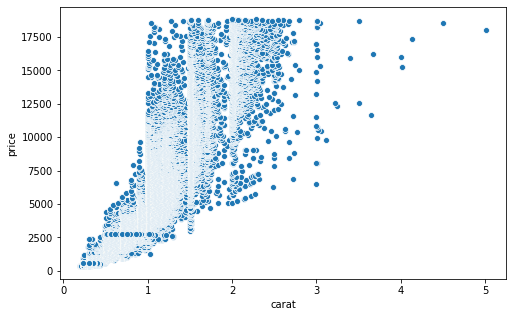

In [297]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='carat',y='price')

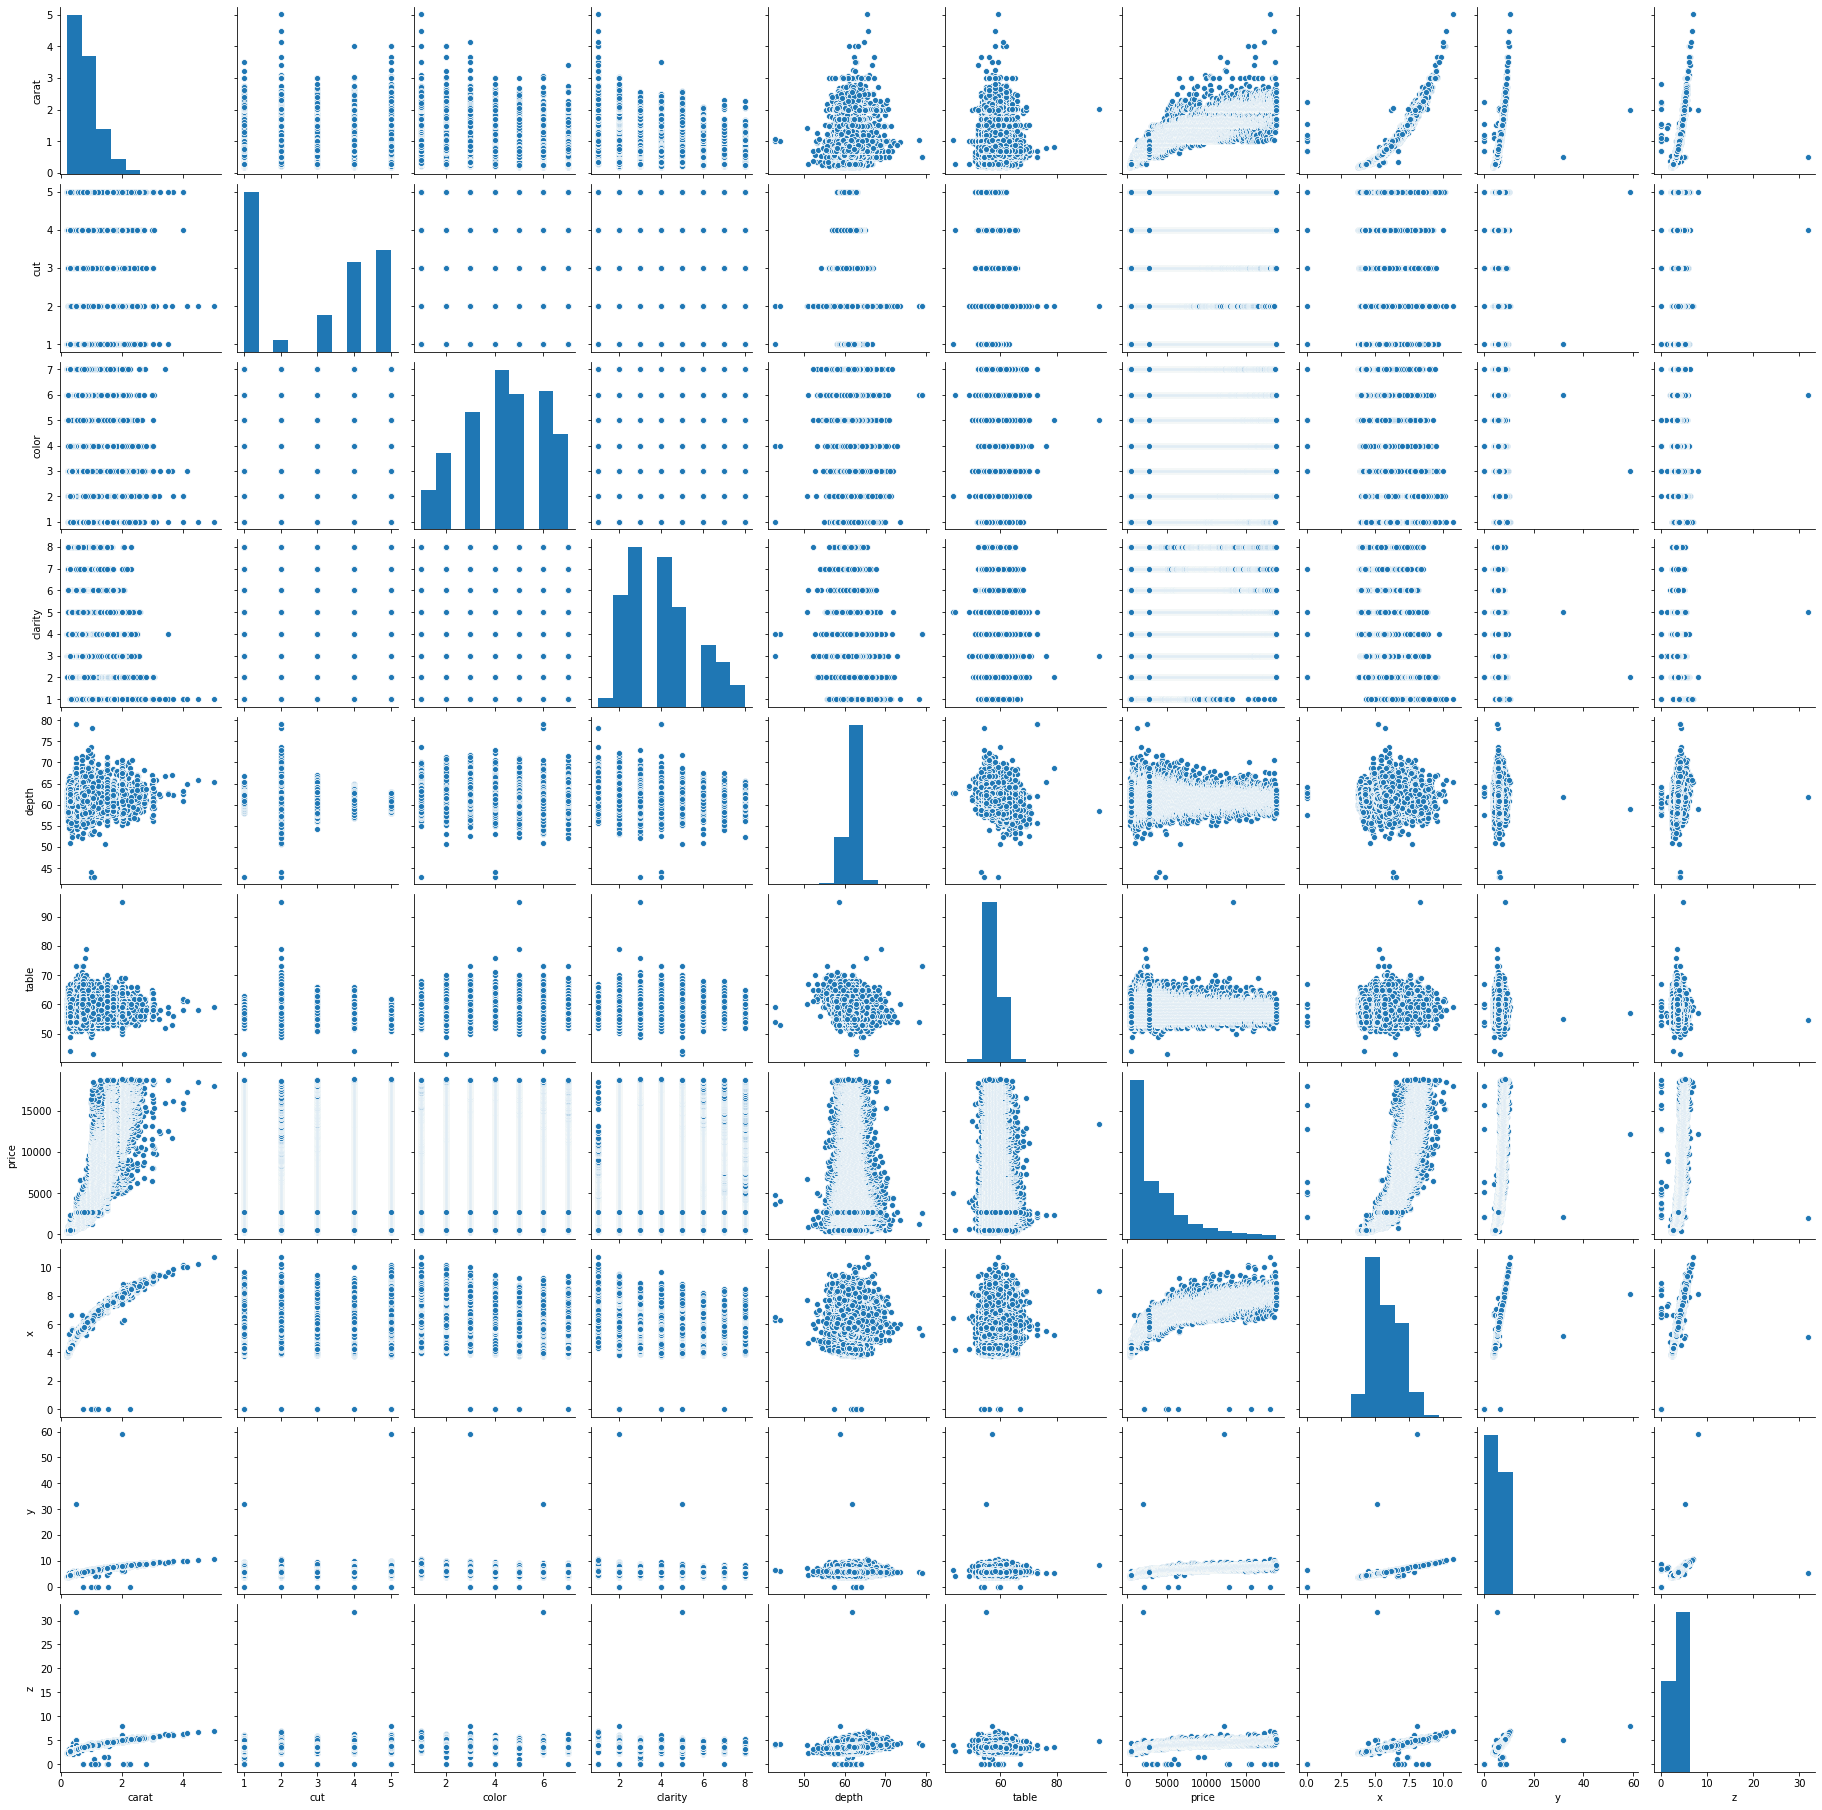

In [295]:
sns.pairplot(df)

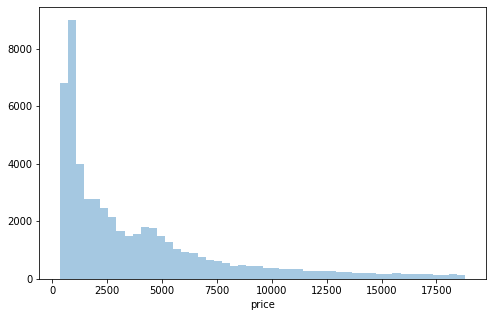

In [298]:
plt.figure(figsize=(8,5))
sns.distplot(df['price'],kde=False)

In [299]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,1,2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
y=df['price']
X=df.drop('price',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
ss=MinMaxScaler().fit(X_train)

In [0]:
X_train=ss.transform(X_train)

In [0]:
X_test=ss.transform(X_test)

In [0]:
model=Sequential()
model.add(layer=Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(layer=Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(layer=Dense(1))
model.compile(optimizer='rmsprop',
              loss='mse')

In [273]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/50
1130/1130 [==============================] - 4s 4ms/step - loss: 26719500.0000 - val_loss: 16194820.0000
Epoch 2/50
1130/1130 [==============================] - 4s 4ms/step - loss: 15957515.0000 - val_loss: 13573736.0000
Epoch 3/50
1130/1130 [==============================] - 4s 4ms/step - loss: 14616803.0000 - val_loss: 12128569.0000
Epoch 4/50
1130/1130 [==============================] - 4s 4ms/step - loss: 12941665.0000 - val_loss: 10154280.0000
Epoch 5/50
1130/1130 [==============================] - 4s 4ms/step - loss: 10796291.0000 - val_loss: 7657661.5000
Epoch 6/50
1130/1130 [==============================] - 4s 4ms/step - loss: 8536035.0000 - val_loss: 5590408.5000
Epoch 7/50
1130/1130 [==============================] - 4s 4ms/step - loss: 6939233.5000 - val_loss: 4260417.0000
Epoch 8/50
1130/1130 [==============================] - 4s 4ms/step - loss: 5958858.0000 - val_loss: 3338300.7500
Epoch 9/50
1130/1130 [==============================] - 4s 4ms/step - loss: 504

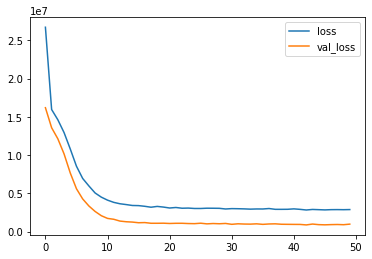

In [274]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [0]:
predictions=model.predict(X_test)

In [0]:
predictions=predictions.reshape(1,len(predictions))

In [0]:
predictions=predictions[0]

In [278]:
predictions


array([ 750.8068 , 2593.08   , 1214.642  , ..., 2737.693  ,  900.66974,
       1455.6418 ], dtype=float32)

In [279]:
y_test

1388       559
50052     2201
41645     1238
42377     1304
17244     6901
         ...  
31474      765
22112    10138
134       2765
31314      758
44272     1576
Name: price, Length: 17801, dtype: int64

In [0]:
sum1=((y_test-y_test.mean())**2).sum()

In [281]:
sum1

277923240685.9801

In [0]:
sum2=((predictions-y_test.mean())**2).sum()

In [283]:
sum2

219055140000.0

In [0]:
R_square=(sum2/sum1)

In [286]:
R_square

0.7881857753936671